In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install roboflow
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="XY63WQR2lm8DifpPNP4l")

project = rf.workspace("dronedetection-ywqkv").project("drone_id")
version = project.version(1)

dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drone_ID-1 in yolov8:: 100%|██████████| 1088/1088 [00:00<00:00, 9852.03it/s] 


In [ ]:
model = YOLO("yolov8n.pt")


100%|██████████| 6.25M/6.25M [00:00<00:00, 148MB/s]


In [ ]:
model.train(data=dataset.location + '/data.yaml',
            epochs=50,
            batch=16,
            imgsz=640,
            project="Drone_ID_Training",
            name="Drone_ID",
            workers=4)


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Drone_ID-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=Drone_ID_Training, name=Drone_ID, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 34.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 160MB/s]


AMP: checks passed ✅


train: Scanning /content/Drone_ID-1/train/labels... 519 images, 54 backgrounds, 0 corrupt: 100%|██████████| 519/519 [00:00<00:00, 2194.75it/s]

train: New cache created: /content/Drone_ID-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Drone_ID-1/valid/labels... 10 images, 2 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 41985.03it/s]

val: New cache created: /content/Drone_ID-1/valid/labels.cache


Plotting labels to Drone_ID_Training/Drone_ID/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Drone_ID_Training/Drone_ID
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.13G      2.052      3.498      1.981         18        640: 100%|██████████| 33/33 [00:12<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         10          8    0.00302          1      0.592      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G      1.838      2.886      1.843         11        640: 100%|██████████| 33/33 [00:10<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         10          8      0.468      0.833      0.687      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.17G      1.898      2.552      1.856         14        640: 100%|██████████| 33/33 [00:11<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         10          8      0.398       0.75      0.585      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.19G      1.885      2.312      1.846         15        640: 100%|██████████| 33/33 [00:09<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         10          8      0.715        0.5      0.523      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.2G       1.87      2.185      1.839          9        640: 100%|██████████| 33/33 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         10          8      0.549        0.5      0.585      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.22G      1.836      1.989      1.755         13        640: 100%|██████████| 33/33 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         10          8      0.682        0.5      0.435      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G      1.852      1.848      1.734         16        640: 100%|██████████| 33/33 [00:10<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         10          8      0.783       0.75      0.808      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G       1.74      1.731      1.682         13        640: 100%|██████████| 33/33 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         10          8      0.694      0.768      0.854      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.26G      1.774      1.637      1.669         12        640: 100%|██████████| 33/33 [00:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10          8      0.739      0.968      0.995      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.29G      1.758      1.681      1.705         10        640: 100%|██████████| 33/33 [00:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10          8      0.464        0.4      0.418      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.3G      1.787      1.539      1.713          6        640: 100%|██████████| 33/33 [00:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         10          8      0.948      0.633      0.829      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G      1.746      1.507      1.678          7        640: 100%|██████████| 33/33 [00:09<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         10          8      0.775      0.798      0.865      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.33G      1.692      1.442      1.635         11        640: 100%|██████████| 33/33 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         10          8      0.911      0.833      0.859      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.36G      1.761      1.393      1.635         11        640: 100%|██████████| 33/33 [00:09<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         10          8      0.738          1      0.939      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.37G      1.683      1.382      1.621         12        640: 100%|██████████| 33/33 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         10          8      0.599      0.649      0.686      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.39G      1.671      1.315      1.606         13        640: 100%|██████████| 33/33 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10          8      0.543      0.833      0.714      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.4G       1.73      1.346      1.634         10        640: 100%|██████████| 33/33 [00:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all         10          8      0.893      0.953      0.995      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.43G      1.665      1.336      1.584         19        640: 100%|██████████| 33/33 [00:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         10          8       0.84          1      0.995      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.44G      1.666      1.307        1.6          9        640: 100%|██████████| 33/33 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         10          8      0.932      0.833      0.912      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.46G      1.659      1.233      1.547         14        640: 100%|██████████| 33/33 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         10          8      0.863      0.984      0.995       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.47G      1.587      1.216      1.555         14        640: 100%|██████████| 33/33 [00:09<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         10          8      0.919      0.953      0.995        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.49G      1.672      1.221      1.609         13        640: 100%|██████████| 33/33 [00:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         10          8      0.774      0.833      0.939      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.51G       1.57      1.212      1.533         12        640: 100%|██████████| 33/33 [00:10<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         10          8      0.934      0.667      0.663      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.53G      1.659      1.203      1.567          7        640: 100%|██████████| 33/33 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         10          8      0.891      0.833      0.876       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.54G      1.581      1.189       1.53         12        640: 100%|██████████| 33/33 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         10          8      0.929          1      0.995      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.56G      1.553      1.124       1.54         11        640: 100%|██████████| 33/33 [00:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         10          8      0.892      0.994      0.995      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.58G      1.545      1.147      1.524         12        640: 100%|██████████| 33/33 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         10          8       0.72       0.75      0.859      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.6G      1.535      1.134      1.528         12        640: 100%|██████████| 33/33 [00:08<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         10          8      0.926      0.833      0.939      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.6G      1.521      1.084      1.494         13        640: 100%|██████████| 33/33 [00:08<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         10          8      0.881      0.972      0.995      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.63G       1.53      1.104       1.52         12        640: 100%|██████████| 33/33 [00:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         10          8      0.877      0.977      0.995      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.65G      1.502      1.107      1.483         11        640: 100%|██████████| 33/33 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         10          8      0.892       0.98      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.66G        1.5      1.041      1.487          9        640: 100%|██████████| 33/33 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         10          8      0.907      0.981      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.67G       1.48      1.016      1.485         12        640: 100%|██████████| 33/33 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         10          8       0.91       0.98      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.7G      1.485       1.06      1.492         18        640: 100%|██████████| 33/33 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         10          8      0.914      0.983      0.995      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.72G      1.452      1.028      1.454         11        640: 100%|██████████| 33/33 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         10          8      0.944      0.833      0.939      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.73G      1.481      1.043      1.483          4        640: 100%|██████████| 33/33 [00:09<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         10          8      0.591       0.66      0.742      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.74G      1.413       1.06      1.448         12        640: 100%|██████████| 33/33 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         10          8      0.868      0.978      0.995      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.77G      1.436     0.9967      1.457         13        640: 100%|██████████| 33/33 [00:08<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         10          8      0.946      0.833      0.912      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.79G      1.429      1.028      1.431         15        640: 100%|██████████| 33/33 [00:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         10          8      0.885      0.982      0.995      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.8G      1.391     0.9787      1.427         10        640: 100%|██████████| 33/33 [00:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


                   all         10          8      0.946      0.833      0.895      0.557
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.81G      1.421     0.8606      1.571          7        640: 100%|██████████| 33/33 [00:11<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         10          8      0.872      0.833      0.939      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.83G      1.373     0.7926      1.516          5        640: 100%|██████████| 33/33 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         10          8      0.879      0.833      0.939       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.85G      1.343     0.7565      1.501          7        640: 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         10          8      0.846      0.978      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.87G       1.31     0.7271      1.487          6        640: 100%|██████████| 33/33 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         10          8      0.841      0.979      0.995      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.88G      1.312     0.7343       1.46          6        640: 100%|██████████| 33/33 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         10          8       0.83      0.982      0.995      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.9G      1.274     0.7146      1.457          6        640: 100%|██████████| 33/33 [00:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         10          8      0.823      0.977      0.995      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.92G      1.252     0.6936      1.451          6        640: 100%|██████████| 33/33 [00:09<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10          8      0.829      0.978      0.995      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.94G      1.232      0.687      1.444          6        640: 100%|██████████| 33/33 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         10          8      0.867      0.978      0.995      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.95G      1.215     0.6724      1.417          6        640: 100%|██████████| 33/33 [00:09<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10          8      0.886      0.978      0.995      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.97G      1.215      0.678       1.42          6        640: 100%|██████████| 33/33 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         10          8       0.88      0.981      0.995      0.603



50 epochs completed in 0.146 hours.
Optimizer stripped from Drone_ID_Training/Drone_ID/weights/last.pt, 6.2MB
Optimizer stripped from Drone_ID_Training/Drone_ID/weights/best.pt, 6.2MB

Validating Drone_ID_Training/Drone_ID/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]


                   all         10          8      0.881      0.973      0.995      0.685
                     2          4          4       0.85          1      0.995      0.711
                     3          2          2          1      0.918      0.995      0.596
                    ID          2          2      0.794          1      0.995      0.747
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to Drone_ID_Training/Drone_ID


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb97a1a5410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model.val()


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Drone_ID-1/valid/labels.cache... 10 images, 2 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


                   all         10          8       0.88      0.972      0.995      0.685
                     2          4          4      0.849          1      0.995      0.711
                     3          2          2          1      0.916      0.995      0.596
                    ID          2          2       0.79          1      0.995      0.747
Speed: 0.2ms preprocess, 45.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to Drone_ID_Training/Drone_ID2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb9777f4090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model.save("Drone_ID_model.pt")
model.export(format="torchscript")


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'Drone_ID_Training/Drone_ID/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 3.1s, saved as 'Drone_ID_Training/Drone_ID/weights/best.torchscript' (11.9 MB)

Export complete (5.0s)
Results saved to /content/Drone_ID_Training/Drone_ID/weights
Predict:         yolo predict task=detect model=Drone_ID_Training/Drone_ID/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=Drone_ID_Training/Drone_ID/weights/best.torchscript imgsz=640 data=/content/Drone_ID-1/data.yaml  
Visualize:       https://netron.app


'Drone_ID_Training/Drone_ID/weights/best.torchscript'


image 1/1 /content/Drone_ID-1/test/images/VID_20250406_155021_mp4-0044_jpg.rf.90bd5d1a70351f9e6f83afb615548329.jpg: 640x640 1 3, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


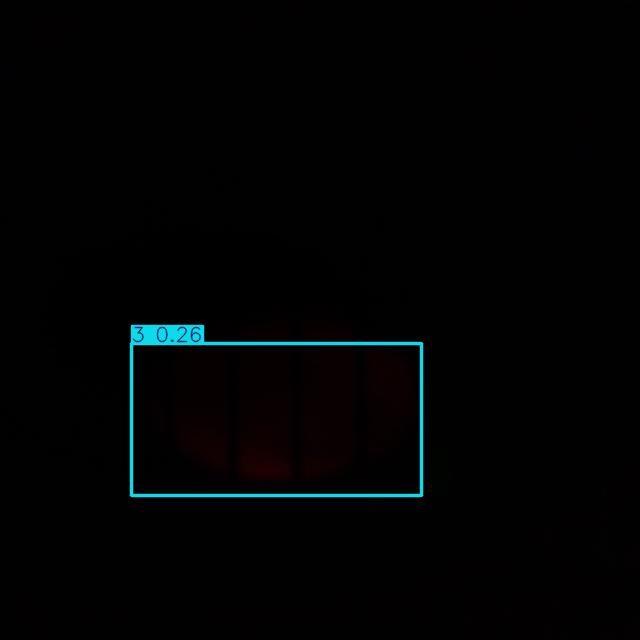

In [ ]:
model = YOLO("Drone_ID_model.pt")
results = model.predict("/content/Drone_ID-1/test/images/VID_20250406_155021_mp4-0044_jpg.rf.90bd5d1a70351f9e6f83afb615548329.jpg")
for result in results:
    result.show()  #


image 1/1 /content/Drone_ID-1/test/images/VID_20250406_154102_mp4-0003_jpg.rf.44f7abf67b337051c82d6fb31a2e56f6.jpg: 640x640 1 ID, 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


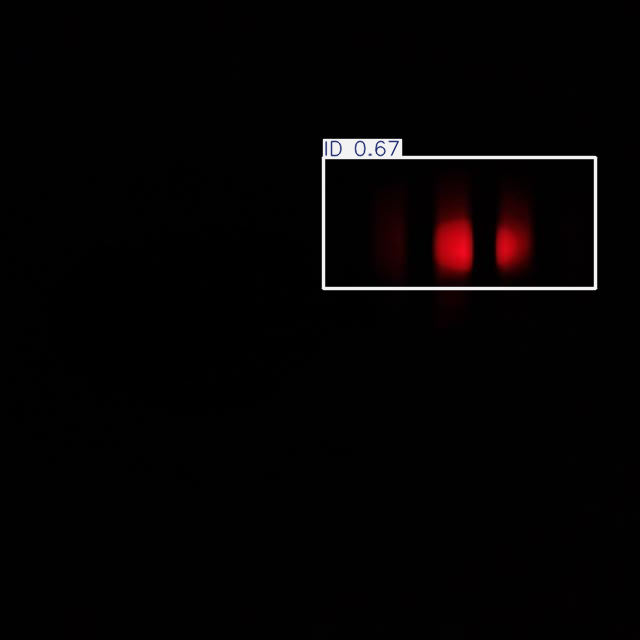

In [ ]:
model = YOLO("Drone_ID_model.pt")
results = model.predict("/content/Drone_ID-1/test/images/VID_20250406_154102_mp4-0003_jpg.rf.44f7abf67b337051c82d6fb31a2e56f6.jpg")
for result in results:
    result.show()